In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
content = pd.read_csv('Content (1).csv')
reactions = pd.read_csv('Reactions (1).csv')
reaction_types = pd.read_csv('ReactionTypes (1).csv')
profile= pd.read_csv('Profile (1).csv')
session = pd.read_csv('Session (1).csv')
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [3]:
content.drop('Unnamed: 0',axis=1,inplace=True)
reactions.drop(['Unnamed: 0','User ID'],axis=1,inplace=True)
reaction_types.drop('Unnamed: 0',axis=1,inplace=True)
profile.drop('Unnamed: 0',axis=1,inplace=True)
session.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df= content.merge(profile, how="left", on="User ID")
df.drop("URL", axis=1, inplace= True)
df=df.merge(session, how="left", on="User ID")
df=df.merge(reactions, how="left", on="Content ID")
df=df.rename(columns={'Type_x':'Cont_Type','Type_y':'Type'})
df=df.merge(reaction_types, how="left", on='Type')
df=df.rename(columns={'Type':'React_Type'})
df.head()


,Content ID,User ID,Cont_Type,Category,Interests,Age,Device,Duration,React_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,Microsoft,10,NaN,2021-04-22 15:17:15,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,Microsoft,10,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,Microsoft,10,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,Microsoft,10,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,"['education', 'studying']",13,Microsoft,10,disgust,2021-01-06 19:13:01,negative,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25573 entries, 0 to 25572
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Content ID  25573 non-null  object 
 1   User ID     25573 non-null  object 
 2   Cont_Type   25573 non-null  object 
 3   Category    25573 non-null  object 
 4   Interests   25573 non-null  object 
 5   Age         25573 non-null  int64  
 6   Device      25573 non-null  object 
 7   Duration    25573 non-null  int64  
 8   React_Type  24573 non-null  object 
 9   Datetime    25553 non-null  object 
 10  Sentiment   24573 non-null  object 
 11  Score       24573 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.5+ MB


In [6]:
df.isnull().sum()

Content ID       0
User ID          0
Cont_Type        0
Category         0
Interests        0
Age              0
Device           0
Duration         0
React_Type    1000
Datetime        20
Sentiment     1000
Score         1000
dtype: int64

In [7]:
df.drop('Interests', axis=1, inplace= True)
df.head()

,Content ID,User ID,Cont_Type,Category,Age,Device,Duration,React_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,NaN,2021-04-22 15:17:15,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2021-01-06 19:13:01,negative,0.0


In [8]:
df=df.dropna()
df.head()


,Content ID,User ID,Cont_Type,Category,Age,Device,Duration,React_Type,Datetime,Sentiment,Score
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2020-11-07 09:43:50,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,dislike,2021-06-17 12:22:51,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,scared,2021-04-18 05:13:58,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,disgust,2021-01-06 19:13:01,negative,0.0
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,13,Microsoft,10,interested,2020-08-23 12:25:58,positive,30.0


In [9]:
df['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', 'Culture', '"food"', 'Food',
       '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [10]:
df['Category']=df['Category'].replace('"','', regex=True)
df['Category']=df['Category'].str.lower()
df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [11]:
df.to_csv('data.csv', index=False)

In [12]:
df.groupby('Category').agg({'React_Type':'count'}).reset_index().sort_values(by="React_Type", ascending=False).head()

,Category,React_Type
0,animals,1897
9,science,1796
7,healthy eating,1717
6,food,1699
12,technology,1698


In [13]:
popscore=df.groupby('Category').agg({"Score":"sum"}).reset_index().sort_values(by="Score", ascending=False)
popscore= popscore.head(5)
popscore

,Category,Score
0,animals,74965.0
9,science,71168.0
7,healthy eating,69339.0
12,technology,68738.0
6,food,66676.0


In [14]:
x=popscore['Category']
y=popscore['Score']


In [15]:
xpos=np.arange(len(x))
xpos

array([0, 1, 2, 3, 4])

<BarContainer object of 5 artists>

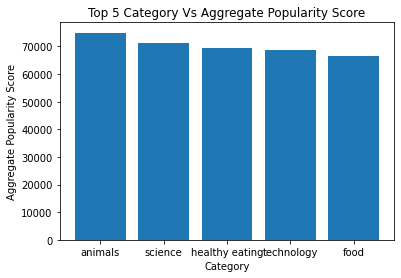

In [26]:
plt.xticks(xpos, x)
plt.title('Top 5 Category Vs Aggregate Popularity Score')
plt.xlabel('Category')
plt.ylabel('Aggregate Popularity Score')
plt.bar(xpos, y)

([<matplotlib.patches.Wedge at 0x1e42dc82a00>,
 [Text(0.9397021302844379, 0.7462974650492185, 'animals'),
  Text(-0.4769701227450719, 1.1011355511509704, 'science'),
  Text(-1.1944780255218388, -0.11498802783529075, 'healthy eating'),
  Text(-0.28358648438483297, -1.1660097366121138, 'technology'),
  Text(0.9924504335554835, -0.6745681114131715, 'food')])

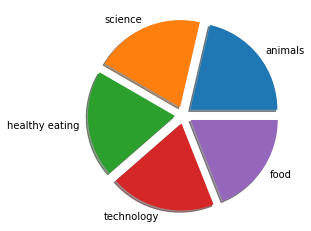

In [36]:
plt.pie(y, labels=x, shadow=True, explode=[0.1,0.1,0.1,0.1,0.1])